In [1]:
import zipfile
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(25)

In [2]:
neu_faces = {}
with zipfile.ZipFile("eigenface_dataset.zip", "r") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith("a.jpg"):
            continue # not a face picture
        #with facezip.open(filename) as image:
        image = facezip.read(filename)
        neu_faces[filename] = cv2.imread(filename, 0)

In [3]:
smi_faces = {}
with zipfile.ZipFile("eigenface_dataset.zip", "r") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith("b.jpg"):
            continue # not a face picture
        #with facezip.open(filename) as image:
        image = facezip.read(filename)
        smi_faces[filename] = cv2.imread(filename, 0)
        

In [4]:
neu_faces = {k: v for k, v in neu_faces.items() if v is not None}
smi_faces = {k: v for k, v in smi_faces.items() if v is not None}

In [5]:
list(neu_faces.keys())[:5]

['upload_dataset/134a.jpg',
 'upload_dataset/7a.jpg',
 'upload_dataset/83a.jpg',
 'upload_dataset/163a.jpg',
 'upload_dataset/175a.jpg']

### Show first 16 faces

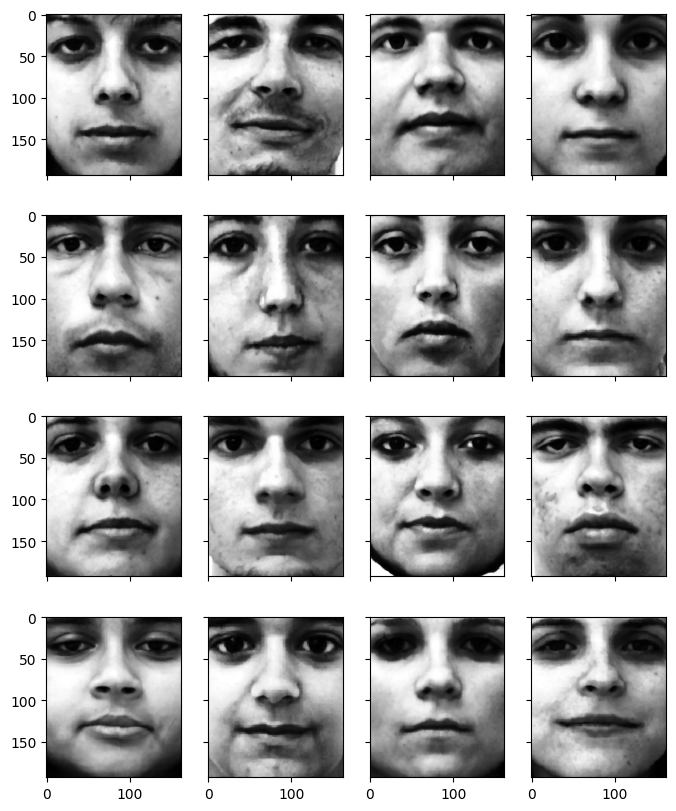

In [6]:
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
neu_faceimages = list(neu_faces.values())[-16:] # take last 16 images
for i in range(16):
    axes[i%4][i//4].imshow(neu_faceimages[i], cmap="gray")
plt.show()

In [7]:
# get face shape
faceshape = list(neu_faces.values())[0].shape
print(faceshape)

(193, 162)


# Question 1

In [8]:
#select 100 random keys of NEUTRAL FACES
rand_neukeys = random.sample(list(neu_faces),100)
rand_neu = {k: v for k, v in neu_faces.items() if k in rand_neukeys}

(31266, 100)


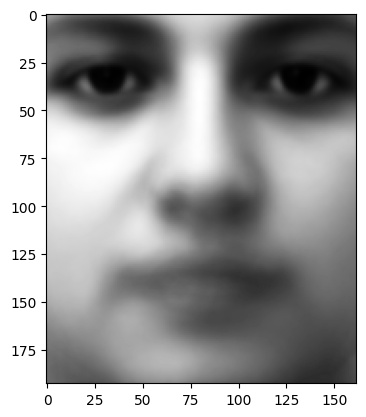

In [9]:
avg_list = np.array([np.array(rand_neu[key].flatten().tolist()) for key in rand_neu]).T
avg_list = np.vstack(avg_list)
print(avg_list.shape)
faceArr = []
for i in range(31266):
    faceArr.append(np.mean(avg_list[i]))

avg_face = np.array(faceArr)
avFace = avg_face.reshape(193,162)
plt.imshow(avFace, cmap="gray")
plt.show()

#get the average of the 100 faces
avg_face = np.sum(avg_list, axis=0)/100
show_avg_face = avg_face.reshape(193,162)
plt.imshow(show_avg_face, cmap="gray")
plt.show()
#for each face subtract avg_face

#flatten the neutral faces and subtract by the avg
flat_neu = [np.array(rand_neu[key].flatten().tolist()) for key in rand_neu]
flat_neu = [np.subtract(i, avg_face) for i in flat_neu]
norm_flat_neu = np.linalg.norm(flat_neu)
flat_neu = [i/norm_flat_neu for i in flat_neu]

In [10]:
#flatten the neutral faces (store as columns) and subtract by the avg
flat_neu = np.array([np.array(rand_neu[key].flatten().tolist()) for key in rand_neu]).T
flat_neu = np.vstack(flat_neu)
print(flat_neu.shape)


#flat_neu = [np.subtract(i, avg_face) for i in flat_neu]
#neu_cov = np.matmul(flat_neu, np.array(flat_neu).transpose())

(31266, 100)


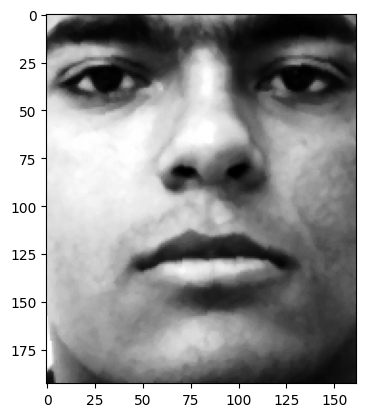

In [11]:
facecol = flat_neu[:,0].reshape(193,162)
plt.imshow(facecol, cmap="gray")
plt.show()

In [12]:
Zface = flat_neu - np.tile(avg_face, (100,1)).T
print(Zface.shape)

(31266, 100)


In [13]:
covFace = np.matmul(Zface.T, Zface)
print(covFace.shape)

(100, 100)


In [14]:
neu_eig, neu_eigv = np.linalg.eig(covFace)

In [15]:
idxNeu = neu_eig.argsort()[::-1]

neuFace = neu_eigv[:,idxNeu]

In [16]:
neuFace.shape

(100, 100)

In [17]:
final_neu = np.matmul(Zface, neuFace)
print(final_neu.shape)

(31266, 100)


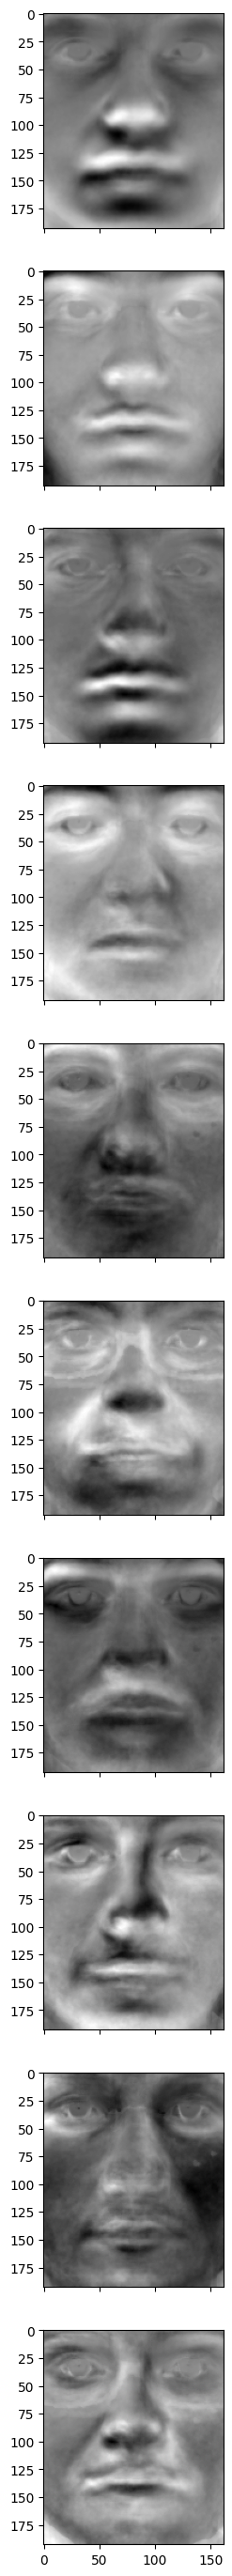

In [18]:
fig, axes = plt.subplots(10,1,sharex=True,sharey=True,figsize=(35,35))
for i in range(10):
    axes[i].imshow(final_neu[:,i].reshape(193,162), cmap="gray")
plt.show()

In [19]:
v,s,vt = np.linalg.svd(covFace)
print(v.shape)
print(s.shape)
print(vt.shape)

(100, 100)
(100,)
(100, 100)


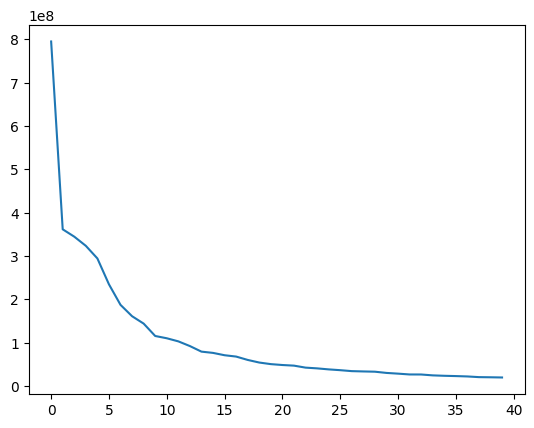

In [20]:
plt.plot(range(40), s[:40])
plt.show()

### I pick k = 13 since the elbow is around there since it is transition from signal to noise

## 1b Smiling!

In [21]:
rand_smikeys = [i.replace("a.jpg", "b.jpg") for i in rand_neukeys]
rand_smi = {k: v for k, v in smi_faces.items() if k in rand_smikeys}

(31266, 100)


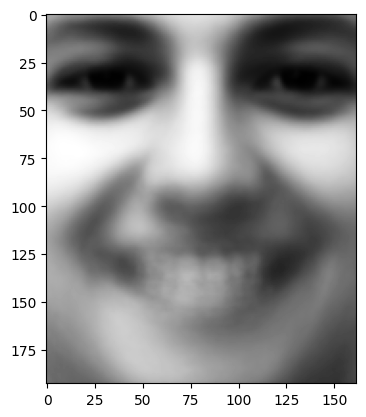

In [22]:
smi_avg_list = np.array([np.array(rand_smi[key].flatten().tolist()) for key in rand_smi]).T
smi_avg_list = np.vstack(smi_avg_list)
print(smi_avg_list.shape)
faceSmiArr = []
for i in range(31266):
    faceSmiArr.append(np.mean(smi_avg_list[i]))

avg_smiface = np.array(faceSmiArr)
avSmFace = avg_smiface.reshape(193,162)
plt.imshow(avSmFace, cmap="gray")
plt.show()

In [23]:
#flatten the smile faces and subtract by the avg
flat_smi = np.array([np.array(rand_smi[key].flatten().tolist()) for key in rand_smi]).T
flat_smi = np.vstack(flat_smi)
print(flat_smi.shape)

(31266, 100)


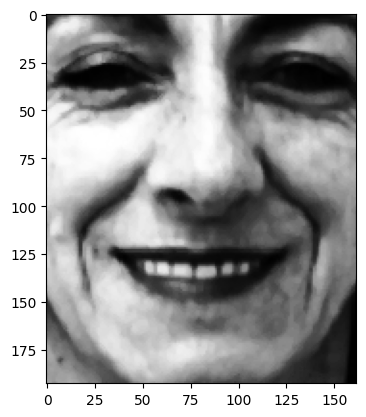

In [24]:
facecol = flat_smi[:,0].reshape(193,162)
plt.imshow(facecol, cmap="gray")
plt.show()

In [25]:
Smface = flat_smi - np.tile(avg_smiface, (100,1)).T
print(Smface.shape)

(31266, 100)


In [26]:
covSmiFace = np.matmul(Smface.T, Smface)
print(covSmiFace.shape)

(100, 100)


In [27]:
eigSmV, eigSmVec = np.linalg.eig(covSmiFace)

In [28]:
idxSmi = eigSmV.argsort()[::-1]

smiFace = eigSmVec[:,idxSmi]

In [29]:
final_smi = np.matmul(Smface, smiFace)
print(final_smi.shape)

(31266, 100)


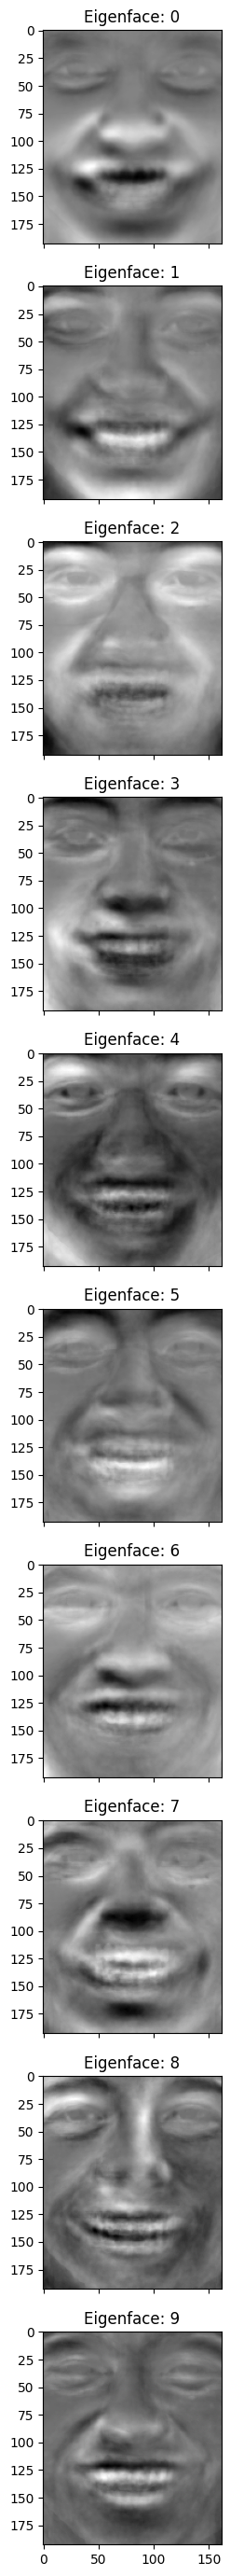

In [30]:
fig, axes = plt.subplots(10,1,sharex=True,sharey=True,figsize=(35,35))
for i in range(10):
    axes[i].imshow(final_smi[:,i].reshape(193,162), cmap="gray")
    axes[i].set_title("Eigenface: " + str(i))
plt.show()

In [31]:
smi_data = np.array(covSmiFace).reshape(100,-1)
u1, s1, vh1 = np.linalg.svd(smi_data, full_matrices=False)

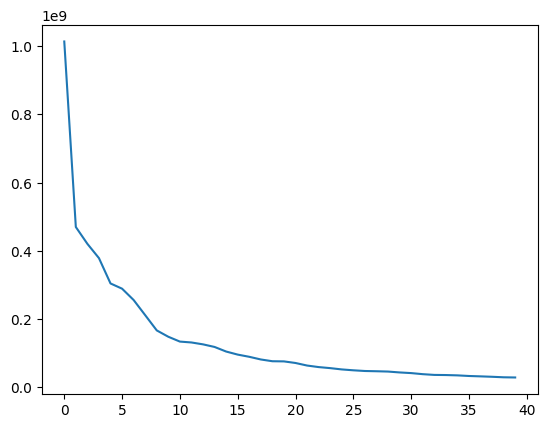

In [32]:
plt.plot(range(40), s1[:40])
plt.show()

### I pick k = 15 since the elbow is around there since it is transition from signal to noise

# Question 2

(31266,)


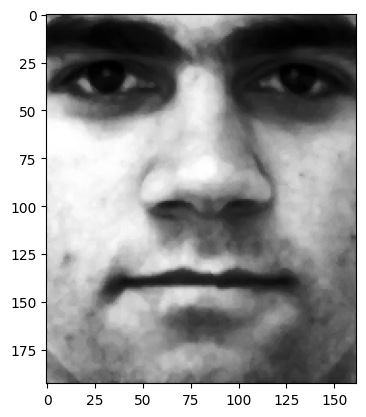

In [33]:
#image I want to reconstruct
recon_neuimg = np.array(flat_neu[:,5])
print(recon_neuimg.shape)
facecol = recon_neuimg.reshape(193,162)
plt.imshow(facecol, cmap="gray")
plt.show()

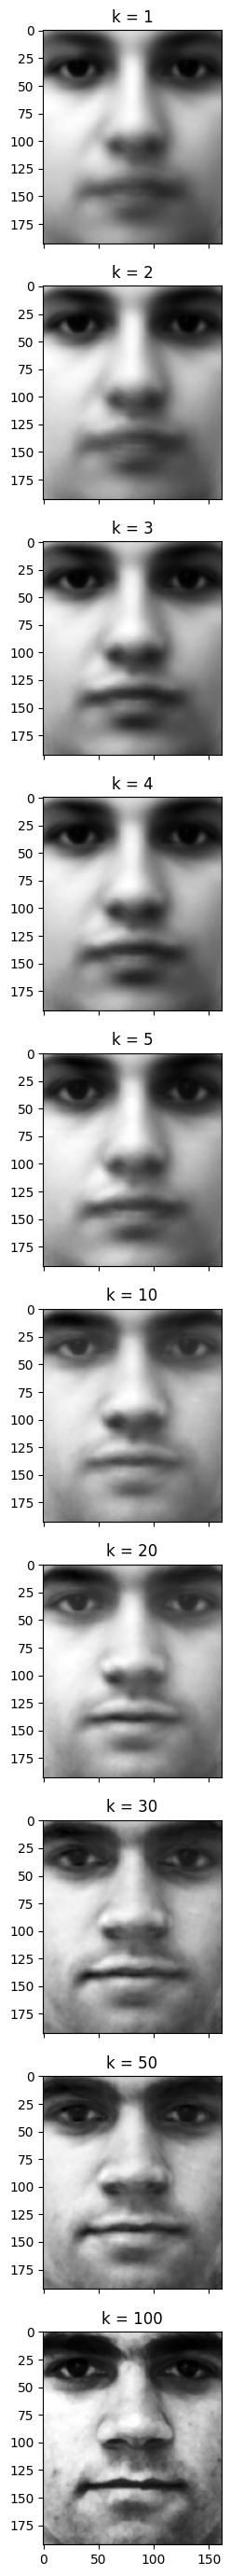

In [34]:
neu_PCA_list = [1,2,3,4,5,10,20,30,50,100]
fig, axes = plt.subplots(len(neu_PCA_list),1,sharex=True,sharey=True,figsize=(35,35))
neu_recon = []
neu_err = []
for k in neu_PCA_list:
    #get weights
    #need the image subtracted by avg since the eq is xi-avg = sum()
    weights = np.linalg.pinv(final_neu[:,:k]).dot(recon_neuimg-avg_face)#Zface[:,5])
    #add mean with weights mult
    recon_img = np.add(np.matmul(final_neu[:,:k], weights), avg_face)
    
    neu_err.append(np.square(np.subtract(recon_img.flatten(),recon_neuimg.flatten())).mean())
    neu_recon.append(recon_img)
    
for i in range(len(neu_PCA_list)):
    axes[i].imshow(neu_recon[i].reshape(193,162), cmap="gray")
    axes[i].set_title("k = " + str(neu_PCA_list[i]))
plt.show()

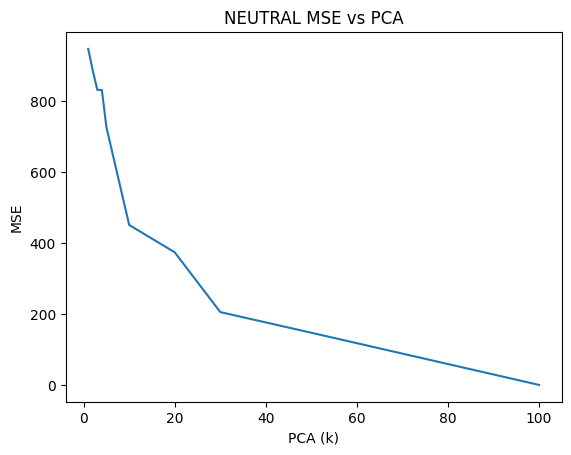

In [35]:
plt.plot(neu_PCA_list, neu_err)
plt.xlabel("PCA (k)")
plt.ylabel("MSE")
plt.title("NEUTRAL MSE vs PCA")
plt.show()

# Question 3
## SMILE IMAGE I WANT TO RECONSTRUCT

(31266,)


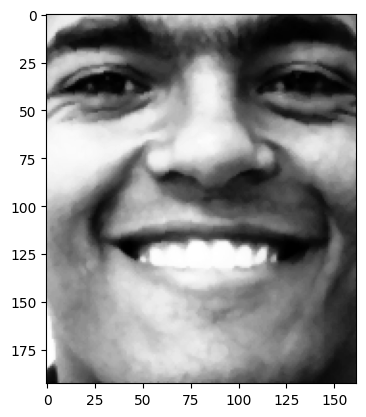

In [36]:
#smile image I want to reconstruct
#image I want to reconstruct
recon_smiimg = np.array(flat_smi[:,5])
print(recon_smiimg.shape)
facecol = recon_smiimg.reshape(193,162)
plt.imshow(facecol, cmap="gray")
plt.show()

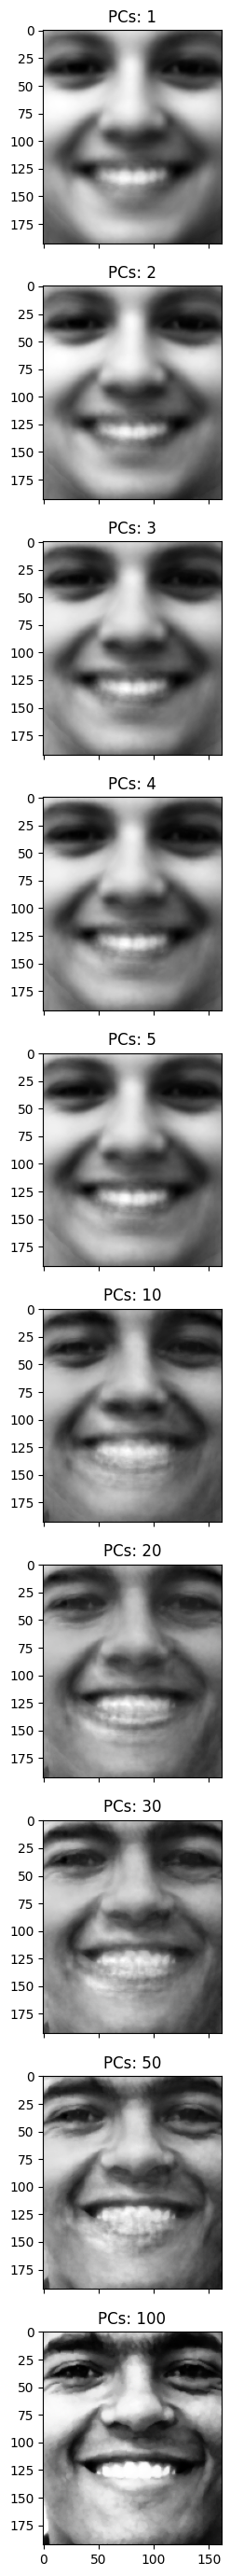

In [37]:
smi_PCA_list = [1,2,3,4,5,10,20,30,50,100]

fig, axes = plt.subplots(len(smi_PCA_list),1,sharex=True,sharey=True,figsize=(35,35))
smi_recon = []
smi_err = []
for k in smi_PCA_list:
    weights = np.linalg.pinv(final_smi[:,:k]).dot(recon_smiimg-avg_smiface)#Zface[:,5])
    #add mean with weights mult
    recon_img = np.add(np.matmul(final_smi[:,:k], weights), avg_smiface)
    smi_err.append(np.square(np.subtract(recon_img.flatten(),recon_smiimg.flatten())).mean())
    smi_recon.append(recon_img)
    

for i in range(len(smi_PCA_list)):
    axes[i].imshow(smi_recon[i].reshape(193,162), cmap="gray")
    axes[i].set_title("PCs: " + str(smi_PCA_list[i]))
plt.show()

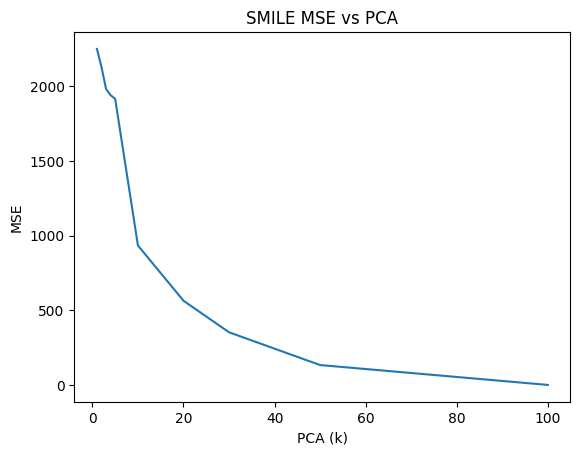

In [38]:
plt.plot(smi_PCA_list, smi_err)
plt.xlabel("PCA (k)")
plt.ylabel("MSE")
plt.title("SMILE MSE vs PCA")
plt.show()

# QUESTION 4
## Select Random Face Neutral that isnt in training

In [39]:
not_neu_face = []
for i in neu_faces:
    if i not in rand_neukeys:
        not_neu_face = neu_faces[i]
        break

(31266,)


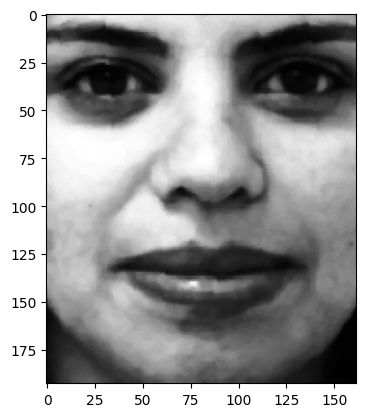

In [40]:
not_neu_face = np.array(not_neu_face).flatten()
print(not_neu_face.shape)
facecol = not_neu_face.reshape(193,162)
plt.imshow(facecol, cmap="gray")
plt.show()

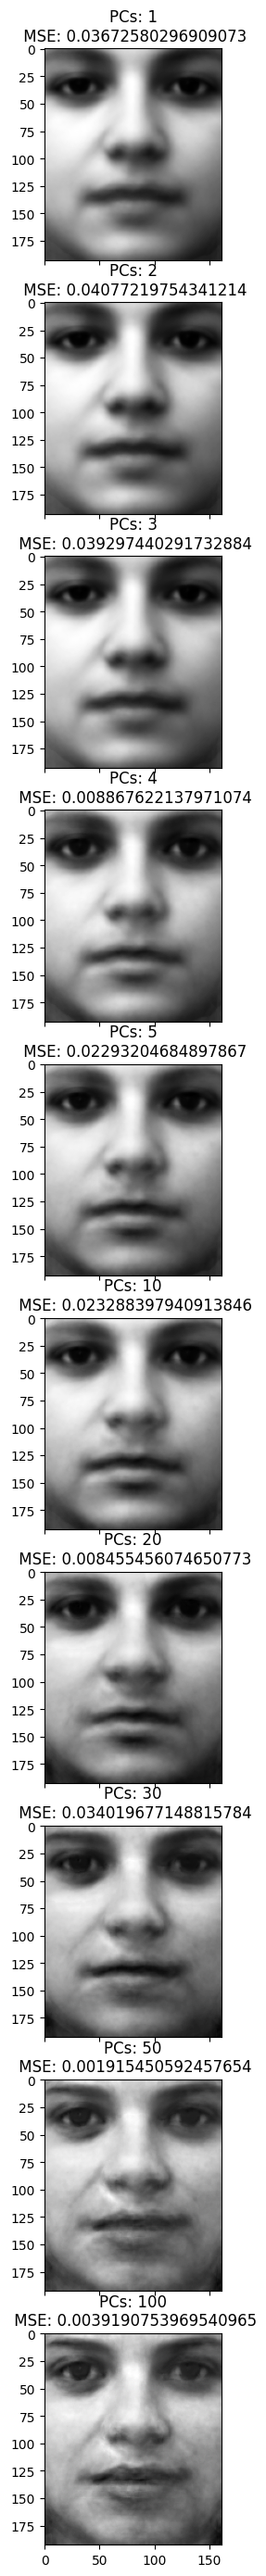

In [41]:
nonneu_PCA_list = [1,2,3,4,5,10,20,30,50,100]

fig, axes = plt.subplots(len(nonneu_PCA_list),1,sharex=True,sharey=True,figsize=(35,35))
nonn_recon = []
nonn_err = []
for k in nonneu_PCA_list:
    weights = np.linalg.pinv(final_neu[:,:k]).dot(not_neu_face-avg_face)#Zface[:,5])
    #add mean with weights mult
    recon_img = np.add(np.matmul(final_neu[:,:k], weights), avg_face)
    nonn_err.append(np.square(np.subtract(recon_img.flatten(),not_neu_face).mean()))
    nonn_recon.append(recon_img)
    
for i in range(len(nonneu_PCA_list)):
    axes[i].imshow(nonn_recon[i].reshape(193,162), cmap="gray")
    axes[i].set_title("PCs: " + str(nonneu_PCA_list[i]) + "\n MSE: " + str(nonn_err[i]))
plt.show()

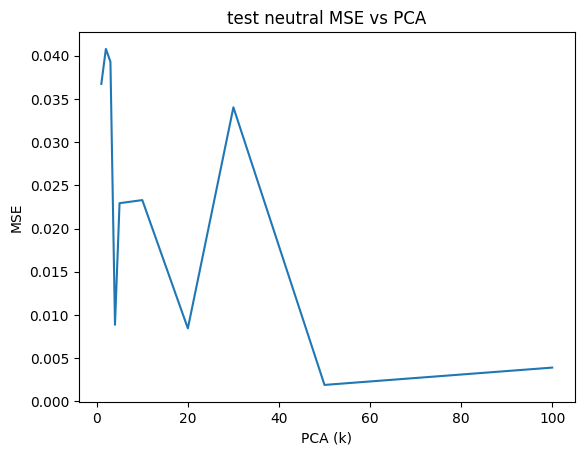

In [42]:
plt.plot(nonneu_PCA_list, nonn_err)
plt.xlabel("PCA (k)")
plt.ylabel("MSE")
plt.title("test neutral MSE vs PCA")
plt.show()

## 4b SMILE TEST BUT NOT IN SMILE TRAIN

In [43]:
not_smi_face = []
for i in smi_faces:
    if i not in rand_smikeys:
        not_neu_face = smi_faces[i]
        break

(31266,)


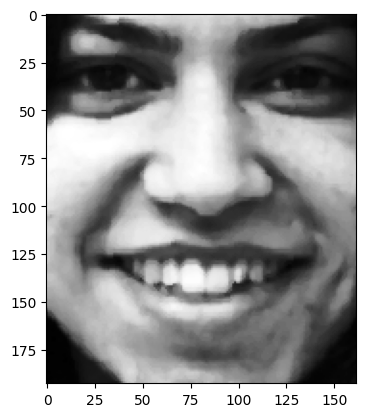

In [44]:
not_smi_face = np.array(not_neu_face).flatten()
print(not_smi_face.shape)
facecol = not_smi_face.reshape(193,162)
plt.imshow(facecol, cmap="gray")
plt.show()

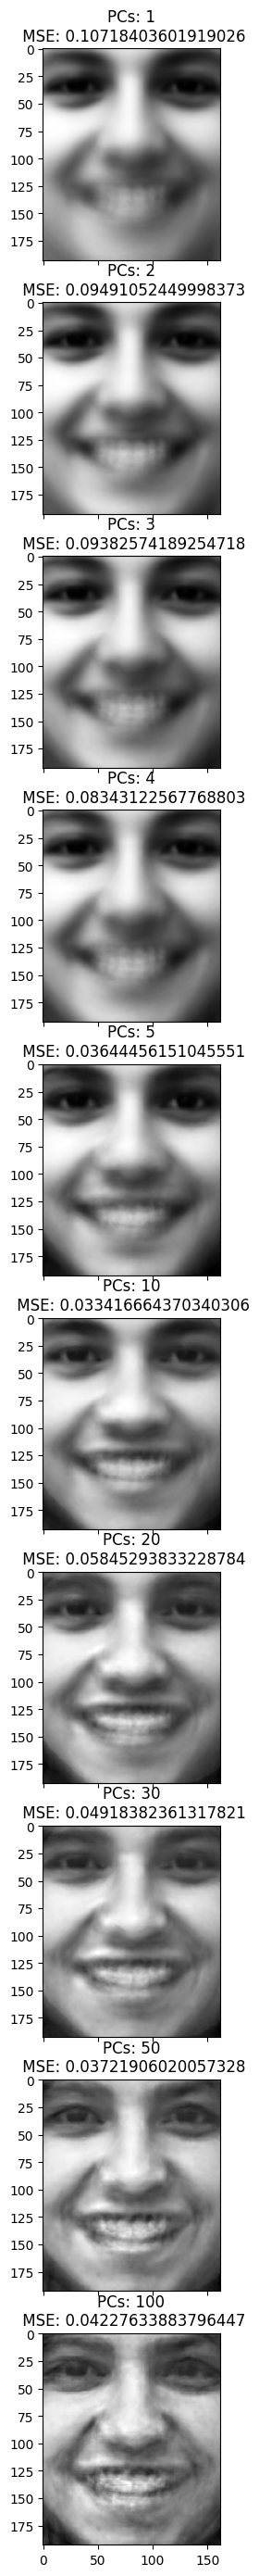

In [45]:
nonsmi_PCA_list = [1,2,3,4,5,10,20,30,50,100]

fig, axes = plt.subplots(len(nonsmi_PCA_list),1,sharex=True,sharey=True,figsize=(35,35))
nons_recon = []
nons_err = []
for k in nonsmi_PCA_list:
    weights = np.linalg.pinv(final_smi[:,:k]).dot(not_smi_face-avg_smiface)#Zface[:,5])
    #add mean with weights mult
    recon_img = np.add(np.matmul(final_smi[:,:k], weights), avg_smiface)
    nons_err.append(np.square(np.subtract(recon_img.flatten(),not_smi_face).mean()))
    nons_recon.append(recon_img)
    
for i in range(len(nonsmi_PCA_list)):
    axes[i].imshow(nons_recon[i].reshape(193,162), cmap="gray")
    axes[i].set_title("PCs: " + str(nonsmi_PCA_list[i]) + "\n MSE: " + str(nons_err[i]))
plt.show()

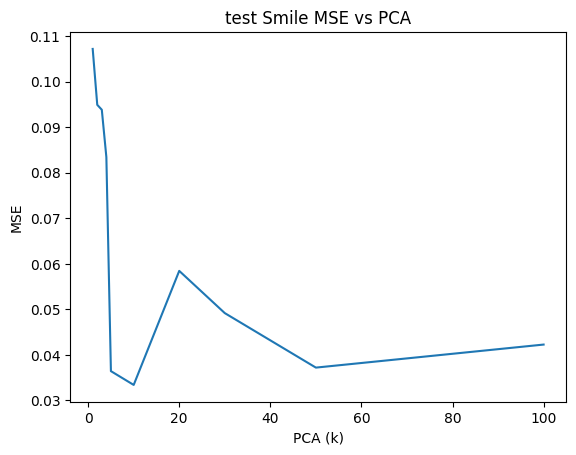

In [46]:
plt.plot(nonsmi_PCA_list, nons_err)
plt.xlabel("PCA (k)")
plt.ylabel("MSE")
plt.title("test Smile MSE vs PCA")
plt.show()

# Question 5

In [58]:
np.random.seed(25)

In [65]:
# Generate testing set
test_60 = []
for i in neu_faces:
    if i not in rand_neukeys:
        test_60.append(np.array(neu_faces[i]).flatten())
        if len(test_60) == 30:
            break
for i in smi_faces:
    if i not in rand_smikeys:
        test_60.append(np.array(smi_faces[i]).flatten())
        if len(test_60) == 60:
            break
test_60 = np.array(test_60)
np.random.shuffle(test_60)

In [66]:
test_60.shape

(60, 31266)

In [ ]:
PCA_number = 20
#Use only 1 k that you found in PCA

fig, axes = plt.subplots(len(PCA_list),1,sharex=True,sharey=True,figsize=(35,35))
n_recon = []
n_err = []
s_recon = []
s_err = []

for g in range(60):
    for k in PCA_list:
        nweights = np.linalg.pinv(final_neu[:,:k]).dot(test_60[g]-avg_face)
        #add mean with weights mult
        nrecon = np.add(np.matmul(final_neu[:,:k], nweights), avg_face)
        n_err.append(np.square(np.subtract(nrecon.flatten(),test_60[g]).mean()))
        n_recon.append(nrecon)
        
        sweights = np.linalg.pinv(final_smi[:,:k]).dot(test_60[g]-avg_smiface)
        #add mean with weights mult
        srecon = np.add(np.matmul(final_smi[:,:k], sweights), avg_smiface)
        s_err.append(np.square(np.subtract(srecon.flatten(),test_60[g]).mean()))
        s_recon.append(srecon)

    for i in range(len(nonsmi_PCA_list)):
        axes[i][0].imshow(n_recon[i].reshape(193,162), cmap="gray")
        axes[i]
        axes[i].set_title("PCs: " + str(nonsmi_PCA_list[i]) + "\n MSE: " + str(nons_err[i]))
    plt.show()